### End 2 End NLP Project
+ Emotion Detection In Text 
+ Text Classifier

In [2]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [50]:
# Load Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [5]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [7]:
# Load Dataset
df = pd.read_csv("data/emotion_dataset_raw.csv")

In [11]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [12]:
# Value Counts
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

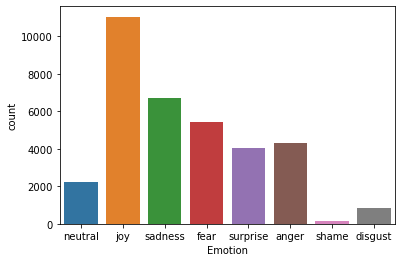

In [13]:
# Plot
sns.countplot(x='Emotion',data=df)

In [8]:
!pip install textblob
from textblob import TextBlob

In [9]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment >0:
        result = "Positive"
    elif sentiment < 0:
        result = "Negative"
    else:
        result = "Neutral"
    return result

In [10]:
get_sentiment("I love this")

'Positive'

In [11]:
df["Sentiment"] = df['Text'].apply(get_sentiment)

In [12]:
df.head()

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


<AxesSubplot:xlabel='Emotion,Sentiment'>

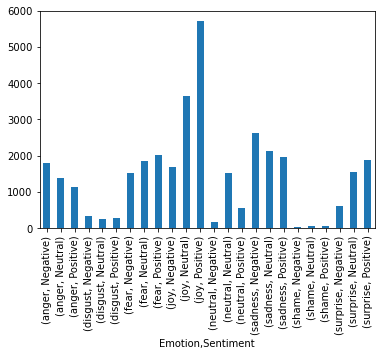

In [13]:
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

C:\Users\manya\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\manya\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


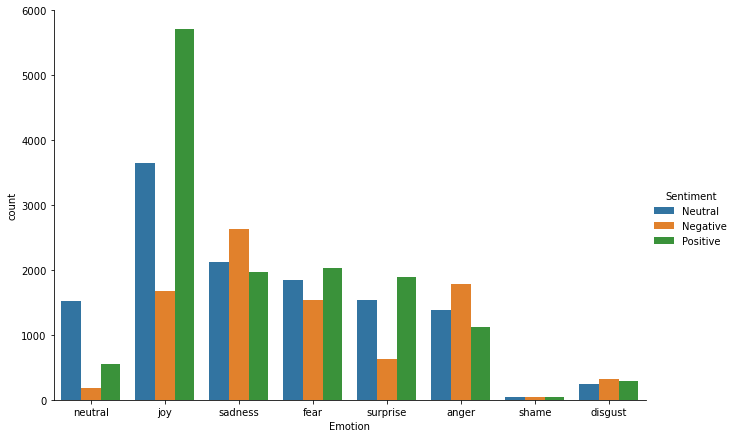

In [14]:
sns.factorplot(x='Emotion',hue ='Sentiment',data = df, kind = "count", size = 6, aspect = 1.5)

In [15]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [20]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [21]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [22]:
# Puntuation
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)

In [23]:
df

,Emotion,Text,Sentiment,Clean_Text
0,neutral,Why ?,Neutral,
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral,Sage Act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive,eye true hazel eyeand brilliant Regular feat...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral,ugh babe hugggzzz u babe naamazed nga ako e b...
...,...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,Positive,gift Hope like it hand wear Itll warm Lol
34788,joy,The world didnt give it to me..so the world MO...,Positive,world didnt meso world DEFINITELY cnt away
34789,anger,A man robbed me today .,Neutral,man robbed today
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Neutral,Youu JEALOUSY #Losing YOU


In [24]:
from collections import Counter

In [32]:
def extract_keywords(text, num = 50):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [33]:
emotion_list = df['Emotion'].unique().tolist()

In [34]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [35]:
joy_list = df[df['Emotion'] == 'joy']['Clean_Text'].tolist()

In [36]:
joy_docx = ''.join(joy_list)

In [37]:
joy_docx

'Sage Act upgrade list tommoroweye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko anglife  Leopold truly happy : hopes prayers beloved son come fruition feeling fail french #fuckfrenchGoodLet  fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhileterribly ecstatic dangerous thing selected study universityYeah  ’ ages  passed BA exams class resultsheard selected fot year university Zambia form Chikola secondary schoolWelp time study daysHeading campus rain grad photosfeeling awesome brings  Ive bought Christmas presents trawl loads shops :)shit pants Pure 100% gravylife  Leopold truly happy : hopes prayers beloved son come fruition Class jamming paper quarter reason 

In [39]:
keyword_joy = extract_keywords(joy_docx)

In [40]:
keyword_joy

{'amp': 647,
 'day': 581,
 'time': 464,
 'Im': 436,
 'like': 435,
 'work': 390,
 'Christmas': 367,
 'today': 305,
 'good': 304,
 'happy': 298,
 'tomorrow': 288,
 'going': 282,
 'love': 271,
 'night': 247,
 'got': 245,
 'home': 245,
 '2': 229,
 'school': 228,
 'morning': 219,
 'joy': 211,
 'life': 205,
 'hours': 200,
 'feel': 189,
 'year': 180,
 's': 176,
 'long': 175,
 'people': 174,
 'new': 172,
 'great': 166,
 'week': 161,
 'days': 161,
 'sleep': 155,
 'family': 150,
 'hour': 149,
 'know': 148,
 'RT': 148,
 'God': 140,
 'excited': 134,
 'cant': 133,
 ':)': 132,
 'tonight': 127,
 'friends': 126,
 'feeling': 125,
 'felt': 125,
 '3': 123,
 'friend': 123,
 'old': 121,
 'right': 120,
 'de': 119,
 '4': 117}

In [53]:
def plot_most_common_words(mydict):
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    sns.barplot(x = 'token', y = 'count', data = df_01)
    plt.xticks(rotation = 45)
    plt.show()

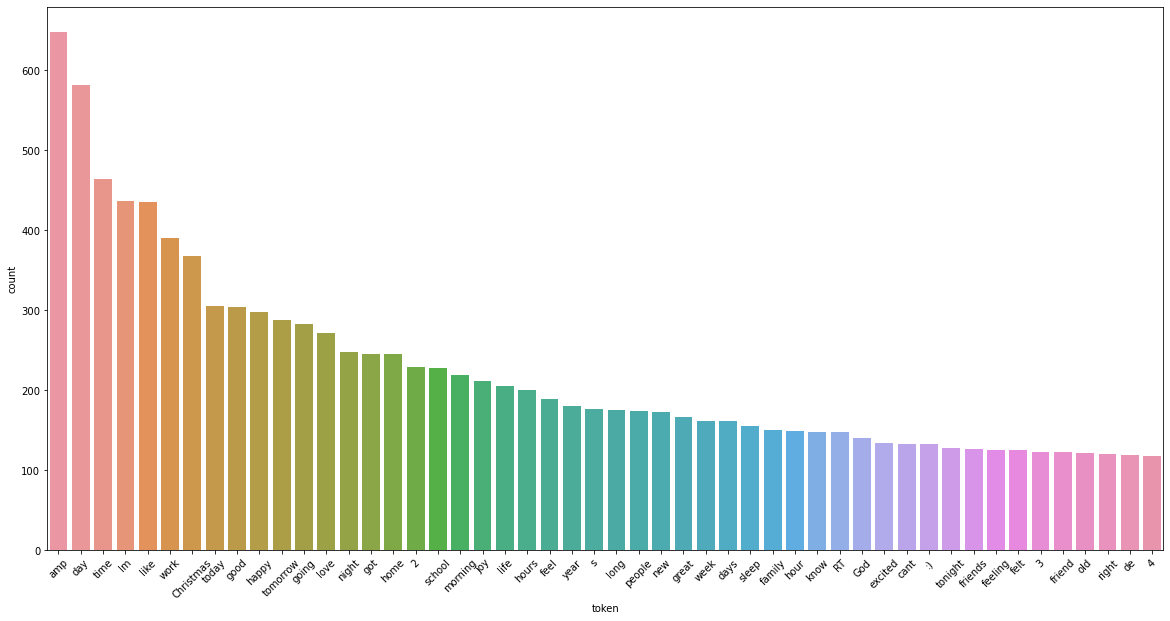

In [54]:
plot_most_common_words(keyword_joy)

In [55]:
surprise_list = df[df['Emotion']=='surprise']['Clean_Text']

In [56]:
surprise_docx = ''.join(surprise_list)
keyword_surprise = extract_keywords(surprise_docx)

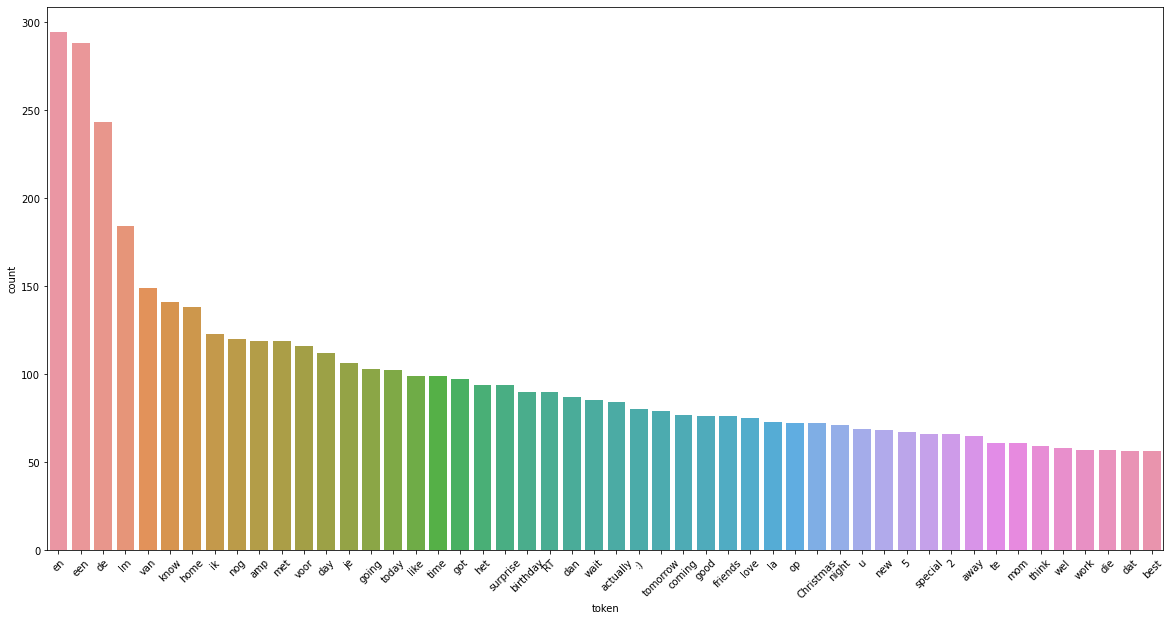

In [57]:
plot_most_common_words(keyword_surprise)

In [59]:
!pip install wordcloud
from wordcloud import WordCloud

In [60]:
def plot_wordcloud(docx):
    mywordcloud=WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

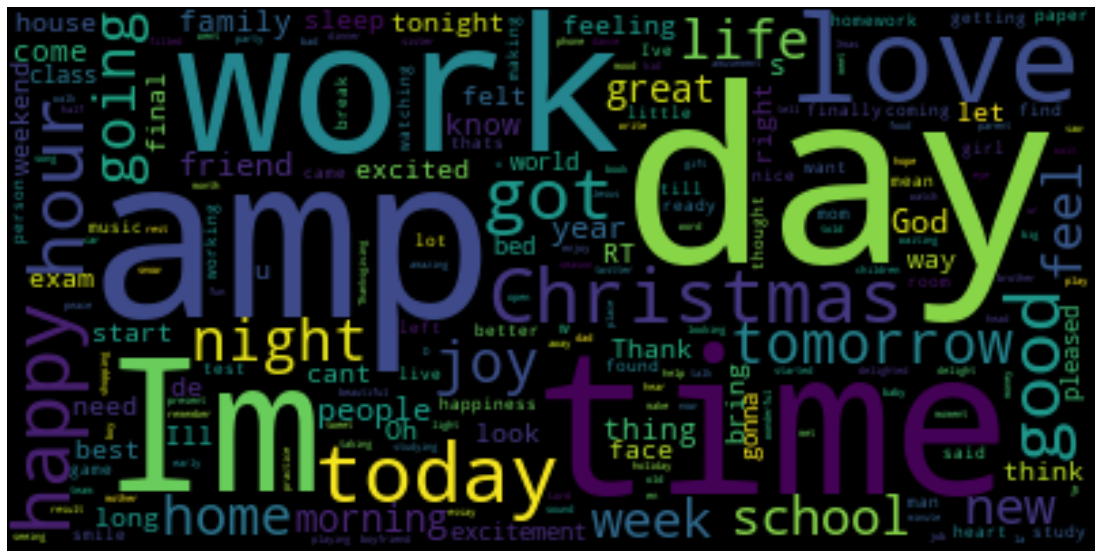

In [62]:
plot_wordcloud(joy_docx)

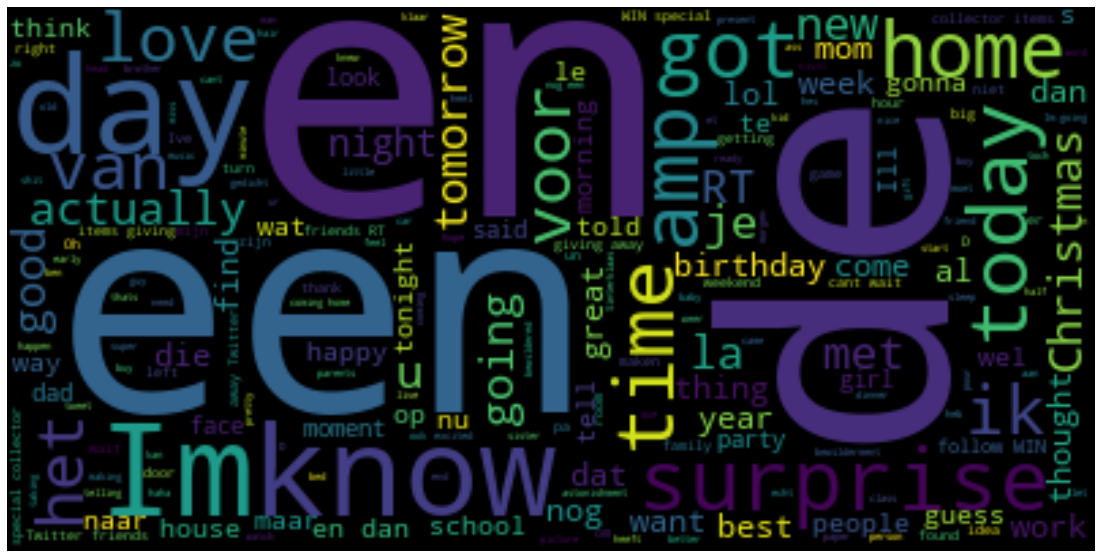

In [63]:
plot_wordcloud(surprise_docx)

In [67]:
# !pip install scikit-learn == 0.13
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [70]:
Xfeatures

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4        ugh babe hugggzzz u  babe naamazed nga ako e b...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                            Youu JEALOUSY #Losing YOU
34791                                think baby dream time
Name: Clean_Text, Length: 34792, dtype: object

In [74]:
cv = CountVectorizer()
X =cv.fit_transform(Xfeatures)

In [75]:
cv.get_feature_names()

['00',
 '000',
 '000ème',
 '0021',
 '00am',
 '00pm',
 '01',
 '0235299130',
 '0330',
 '0400',
 '045',
 '05',
 '0512',
 '06',
 '073',
 '0798765',
 '08',
 '0800',
 '09',
 '099b8',
 '0l',
 '0ntworpen',
 '0o',
 '0oquot',
 '0w',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100000yr',
 '10000th',
 '1000gifts',
 '1000s',
 '1000shs',
 '1000th',
 '100s',
 '100th',
 '101',
 '1010',
 '1015',
 '101quot',
 '102',
 '1021',
 '1022',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '10373629',
 '104',
 '1040',
 '105',
 '106',
 '1080',
 '10am',
 '10ans',
 '10h',
 '10hrs',
 '10k',
 '10mins',
 '10pm',
 '10puntos',
 '10ritengono',
 '10th',
 '10x',
 '10year',
 '10years',
 '10yrolds',
 '11',
 '110',
 '1100pm',
 '1104',
 '110km',
 '111',
 '1111ème',
 '112',
 '1130',
 '115',
 '1162',
 '118',
 '11am',
 '11hour',
 '11months',
 '11pm',
 '11yr',
 '12',
 '120',
 '1200',
 '121',
 '12181',
 '122',
 '122511',
 '123',
 '1230',
 '125',
 '1250',
 '12521260',
 '128',
 '128600',
 '1295',
 '12days',
 '12hours',
 '12hr',
 '12hrstwi

In [82]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)

In [83]:
nv_model = MultinomialNB()
nv_model.fit(x_train,y_train)

MultinomialNB()

In [85]:
nv_model.score(x_test,y_test)

0.5642843456600881

In [86]:
y_pred_for_nv = nv_model.predict(x_test)

In [87]:
y_pred_for_nv

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'anger', 'sadness'],
      dtype='<U8')

In [88]:
sample_text = ["I Love this"]

In [89]:
vect = cv.transform(sample_text).toarray()

In [90]:
nv_model.predict(vect)

array(['joy'], dtype='<U8')

In [91]:
nv_model.predict_proba(vect)

array([[3.11713917e-02, 9.66074618e-04, 1.90401288e-01, 5.93787530e-01,
        8.07430391e-04, 1.48004385e-01, 5.93920380e-06, 3.48559610e-02]])

In [92]:
nv_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [93]:
np.max(nv_model.predict_proba(vect))

0.5937875300103306

In [110]:
def predict_emotion(sample_text,model):
    myvect = cv.transform(sample_text).toarray()
    prediction = model.predict(myvect)
    pred_proba = model.predict_proba(myvect)
    pred_percentage_for_all = dict(zip(model.classes_,pred_proba[0]))
    print("Prediction:{}, Prediction Score:{}".format(prediction[0],np.max(pred_proba)))
    print(prediction[0])
    return pred_percentage_for_all

In [111]:
predict_emotion(sample_text,nv_model)

Prediction:joy, Prediction Score:0.5937875300103306
joy


{'anger': 0.03117139168026127,
 'disgust': 0.0009660746177719747,
 'fear': 0.1904012881772129,
 'joy': 0.5937875300103306,
 'neutral': 0.0008074303906494948,
 'sadness': 0.14800438487462184,
 'shame': 5.939203804461533e-06,
 'surprise': 0.03485596104534786}

In [113]:
predict_emotion(["He hates it"],nv_model)

Prediction:sadness, Prediction Score:0.3956527297950237
sadness


{'anger': 0.07643613872781163,
 'disgust': 0.011039016759803375,
 'fear': 0.03794318078869056,
 'joy': 0.3883078078963937,
 'neutral': 0.0005608892829645302,
 'sadness': 0.3956527297950237,
 'shame': 4.890976736911073e-05,
 'surprise': 0.09001132698194324}

In [114]:
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.64      0.49      0.56      1283
     disgust       0.53      0.03      0.06       292
        fear       0.75      0.60      0.67      1645
         joy       0.51      0.86      0.64      3311
     neutral       0.30      0.02      0.04       675
     sadness       0.56      0.54      0.55      2015
       shame       1.00      0.03      0.05        36
    surprise       0.61      0.27      0.38      1181

    accuracy                           0.56     10438
   macro avg       0.61      0.36      0.37     10438
weighted avg       0.57      0.56      0.53     10438



In [115]:
confusion_matrix(y_test,y_pred_for_nv)

array([[ 633,    0,   58,  373,    7,  199,    0,   13],
       [  31,   10,   25,  132,    2,   81,    0,   11],
       [  79,    2,  984,  353,    4,  160,    0,   63],
       [  76,    1,  100, 2848,    9,  204,    0,   73],
       [  20,    0,   17,  550,   14,   71,    0,    3],
       [  89,    1,   74,  726,    7, 1080,    0,   38],
       [   9,    0,    7,   13,    0,    5,    1,    1],
       [  49,    5,   47,  621,    4,  135,    0,  320]], dtype=int64)

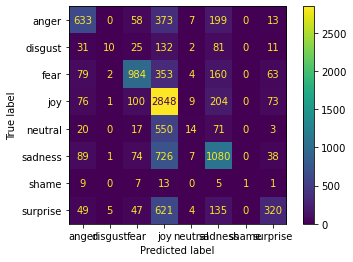

In [116]:
plot_confusion_matrix(nv_model,x_test,y_test)

In [117]:
import joblib

In [119]:
model_file = open("emotion_classifier_nv_model_6_nov_2021.pkl","wb")
joblib.dump(nv_model,model_file)
model_file.close()

In [121]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

C:\Users\manya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [122]:
lr_model.score(x_test,y_test)

0.622341444721211

In [123]:
predict_emotion(sample_text,lr_model)

Prediction:joy, Prediction Score:0.40051534058576155
joy


{'anger': 0.042905783646519105,
 'disgust': 0.015461871455263025,
 'fear': 0.0986282751296857,
 'joy': 0.40051534058576155,
 'neutral': 0.06782874646853501,
 'sadness': 0.2775713801813135,
 'shame': 0.0013351288515719094,
 'surprise': 0.09575347368135022}

In [125]:
!pip install eli5
import eli5

In [126]:
eli5.show_weights(lr_model,top = 20)

In [128]:
class_names = ylabels.unique().tolist()

In [140]:
feature_names = cv.get_feature_names()

In [141]:
eli5.show_weights(lr_model,feature_names=feature_names, target_names = class_names)